In [3]:
# Common imports
import numpy as np
import pandas as pd
np.random.seed(42)

In [4]:
flippers = pd.read_csv("INPUTS.csv")
flippers.head()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
0,23,23,20850,1453,LOTS 13 TO 18 INC BLK L 4TH AD,0,3,154349,13755,1,0,0,13661,5,205000,0
1,18,22,10000,1330,LOT 8 BLK 266 DELTONA LAKES UN,0,3,149271,20400,1,0,0,278,3,210000,0
2,7,30,10000,1395,LOT 9 BLK 322 DELTONA LAKES UN,0,3,169016,21200,1,0,0,0,5,199900,0
3,12,20,10000,1551,LOT 9 BLK 370 DELTONA LAKES UN,0,3,167252,21200,1,0,0,142,4,186000,0
4,42,42,10250,1702,LOT 7 BLK 366 DELTONA LAKES UN,0,3,130450,24600,1,0,0,897,4,219900,0


In [5]:
flippers.shape

(401723, 16)

In [6]:
flippers.shape

(401723, 16)

In [7]:
flippers.dtypes

EFF_AGE             int64
ACT_AGE             int64
LND_SQFOOT          int64
TOT_LVG_AREA        int64
S_LEGAL            object
CONST_CLASS         int64
IMP_QUAL            int64
JV                  int64
LND_VAL             int64
NO_BULDNG           int64
NCONST_VAL          int64
DEL_VAL             int64
SPEC_FEAT_VAL       int64
MonthDifference     int64
SALE_PRC1           int64
Target_Var          int64
dtype: object

## Splitting the data into train and test sets

In [8]:
#Splitting Data
from sklearn.model_selection import train_test_split
train, test = train_test_split(flippers, test_size=0.3)

In [9]:
#Checking for missing values
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [10]:
train.isnull()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
395999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
379095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
330219,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
365838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
131932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146867,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [12]:
#Separating Target Variable
train_y = train[['Target_Var']]
test_y = test[['Target_Var']]

#Removing Target, Profit_Loss and SALE_PRC2 from the Data Set
train_x = train.drop(['Target_Var'], axis =1)
test_x = test.drop(['Target_Var'], axis =1)   

In [13]:
train_x.shape

(281206, 15)

In [14]:
#Transforming Data Types for Numeric Columns which are categorical in nature:
#Int
flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference'
        ,'SALE_PRC1']]=flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']].astype(int)

#Str
flippers[['S_LEGAL','IMP_QUAL','CONST_CLASS']]=flippers[['S_LEGAL','IMP_QUAL'
,'CONST_CLASS']].astype(str)


In [15]:
numeric_columns = ['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
                  'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']

categorical_columns = ['S_LEGAL','IMP_QUAL','CONST_CLASS']

In [16]:
numeric_columns

['EFF_AGE',
 'ACT_AGE',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'JV',
 'LND_VAL',
 'NO_BULDNG',
 'NCONST_VAL',
 'DEL_VAL',
 'SPEC_FEAT_VAL',
 'MonthDifference',
 'SALE_PRC1']

In [17]:
categorical_columns

['S_LEGAL', 'IMP_QUAL', 'CONST_CLASS']

In [18]:
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [19]:
# Numeric Transformer
numeric_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [20]:
#Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
#Preprocessor
preprocessor = ColumnTransformer([
    ('num',numeric_transformer,numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
  
])

In [22]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_x)

train_x

<281206x100785 sparse matrix of type '<class 'numpy.float64'>'
	with 4218090 stored elements in Compressed Sparse Row format>

In [23]:
#Fit and transform the test data
test_x = preprocessor.transform(test_x)

test_x

<120517x100785 sparse matrix of type '<class 'numpy.float64'>'
	with 1783563 stored elements in Compressed Sparse Row format>

In [24]:
type(train_x), type(test_x)

(scipy.sparse._csr.csr_matrix, scipy.sparse._csr.csr_matrix)

In [25]:
train_x.shape, test_x.shape

((281206, 100785), (120517, 100785))

In [26]:
#Retrieving the column names:
preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT', ...,
       'cat__CONST_CLASS_3', 'cat__CONST_CLASS_4', 'cat__CONST_CLASS_5'],
      dtype=object)

In [27]:
# Check if your scikit-learn version is below 1.1.1

import sklearn

sklearn.__version__

'1.1.2'

In [28]:
# Now we can retrieve the column names:

preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT', ...,
       'cat__CONST_CLASS_3', 'cat__CONST_CLASS_4', 'cat__CONST_CLASS_5'],
      dtype=object)

In [29]:
from scipy.sparse import csr_matrix

In [30]:
train_x1 = pd.DataFrame.sparse.from_spmatrix(train_x)
test_x1 = pd.DataFrame.sparse.from_spmatrix(test_x)

In [31]:
type(train_x1), type(test_x1)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [32]:
train_x1.shape, test_x1.shape

((281206, 100785), (120517, 100785))

In [33]:
train_x1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,100775,100776,100777,100778,100779,100780,100781,100782,100783,100784
0,-1.001640,-1.193780,-0.050022,-0.730576,-0.347097,-0.207045,-0.111491,-0.086052,-0.060607,-0.532543,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.942811,-1.145726,-0.055858,3.214772,0.309583,-0.078472,-0.111491,-0.086052,-0.060607,1.857941,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.001551,-0.376854,-0.094158,-0.144875,-0.391592,-0.197313,6.617859,-0.086052,-0.060607,0.130225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.001551,0.872564,0.115833,0.666275,0.238633,0.101213,-0.111491,-0.086052,-0.060607,-0.532543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.822051,1.016727,-0.096499,-0.615528,-0.239427,0.030204,-0.111491,-0.086052,-0.060607,-0.168523,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Baseline Accuracys

In [34]:
#Majority Class
train_y.value_counts()

Target_Var
0             218646
1              62560
dtype: int64

In [35]:
#Majority Class by Percentage
train_y.value_counts()/len(train_y)

Target_Var
0             0.77753
1             0.22247
dtype: float64

### Baseline - 78%

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(random_state =42)
lr.fit(train_x,train_y)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [38]:
lr.score(train_x,train_y),lr.score(test_x,test_y)

(0.8272440844078718, 0.8000116166184024)

## Accuracy

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
#Predicting the trian values
train_y_pred = lr.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8272440844078718

In [41]:
#Predicting the test values
test_y_pred = lr.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8000116166184024

## Classification Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_y_pred)

array([[90423,  3409],
       [20693,  5992]], dtype=int64)

## Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     93832
           1       0.64      0.22      0.33     26685

    accuracy                           0.80    120517
   macro avg       0.73      0.59      0.61    120517
weighted avg       0.77      0.80      0.76    120517



In [44]:
lr.intercept_

array([-1.02380528])

In [45]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

In [46]:
inv_logit(lr.intercept_)

array([0.26428684])

In [47]:
flippers_inputs = flippers.drop(['Target_Var'], axis =1)


In [48]:
flippers_inputs.head

<bound method NDFrame.head of         EFF_AGE  ACT_AGE  LND_SQFOOT  TOT_LVG_AREA  \
0            23       23       20850          1453   
1            18       22       10000          1330   
2             7       30       10000          1395   
3            12       20       10000          1551   
4            42       42       10250          1702   
...         ...      ...         ...           ...   
401718       56       56       11199          1817   
401719       60       60        9008          1860   
401720       68       68        8799          1323   
401721       68       68        8250          1166   
401722       17       17        6534          1416   

                               S_LEGAL CONST_CLASS IMP_QUAL      JV  LND_VAL  \
0       LOTS 13 TO 18 INC BLK L 4TH AD           0        3  154349    13755   
1       LOT 8 BLK 266 DELTONA LAKES UN           0        3  149271    20400   
2       LOT 9 BLK 322 DELTONA LAKES UN           0        3  169016    21200   
3

In [49]:
flippers_target = flippers['Target_Var']

In [50]:
flippers_target.head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
401718    0
401719    0
401720    0
401721    0
401722    0
Name: Target_Var, Length: 401723, dtype: int64>

In [51]:
cols = flippers_inputs.columns
for col, val in sorted(
    zip(cols, lr.coef_[0]),
    key=lambda x: x[1],
    reverse=True,
    ):print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")


S_LEGAL        2.423      0.919
EFF_AGE        0.211      0.553
TOT_LVG_AREA     0.168      0.542
CONST_CLASS     0.074      0.518
NO_BULDNG      0.032      0.508
LND_VAL        0.021      0.505
LND_SQFOOT    -0.008      0.498
SALE_PRC1     -0.017      0.496
IMP_QUAL      -0.023      0.494
JV            -0.027      0.493
SPEC_FEAT_VAL    -0.082      0.479
ACT_AGE       -0.173      0.457
MonthDifference    -0.215      0.446
NCONST_VAL    -0.610      0.352
DEL_VAL      -16.754      0.000


In [52]:
from yellowbrick.model_selection.importances import FeatureImportances
from matplotlib import pyplot as plt

## to do: select top 5 and bottom 5 cofficients

In [53]:

test_x_10 = test_x[:10]
test_y_10 = test_y[:10]

In [54]:
test_x_10.shape, test_y_10.shape

((10, 100785), (10, 1))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


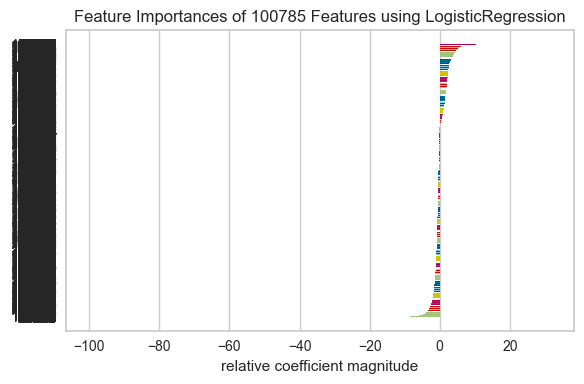

In [55]:
fig, ax = plt.subplots (figsize=(6,4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(test_x_10,test_y_10)
fi_viz.poof()
fig.savefig("LR_Feature_Importance.png")

In [56]:
test_x_top_5_features = np.sort(flippers_train_processed)[:10,-5:]
#test_y_top_5_features = test_y[:10,-5:]

NameError: name 'flippers_train_processed' is not defined

In [ ]:
test_x_top_5_features.shape, test_y_10.shape

((10, 5), (10, 1))